In [94]:
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the dataset
data = pd.read_csv('data_badan_pangan_1.csv')

In [95]:
data.shape
data.describe()

,GKPTP,GKPTPG,GKGTP,Beras
count,1016.000000,1016.000000,1016.000000,1016.000000
mean,5131.879921,5435.797244,6324.143701,11550.364173
std,906.149059,923.300545,1036.229265,1717.079536
min,4060.000000,4320.000000,5080.000000,8860.000000
25%,4410.000000,4690.000000,5580.000000,10157.500000
50%,4850.000000,5165.000000,6035.000000,11030.000000
75%,5502.500000,5855.000000,6730.000000,12935.000000
max,7390.000000,7860.000000,9300.000000,16100.000000


<AxesSubplot:xlabel='Beras', ylabel='Count'>

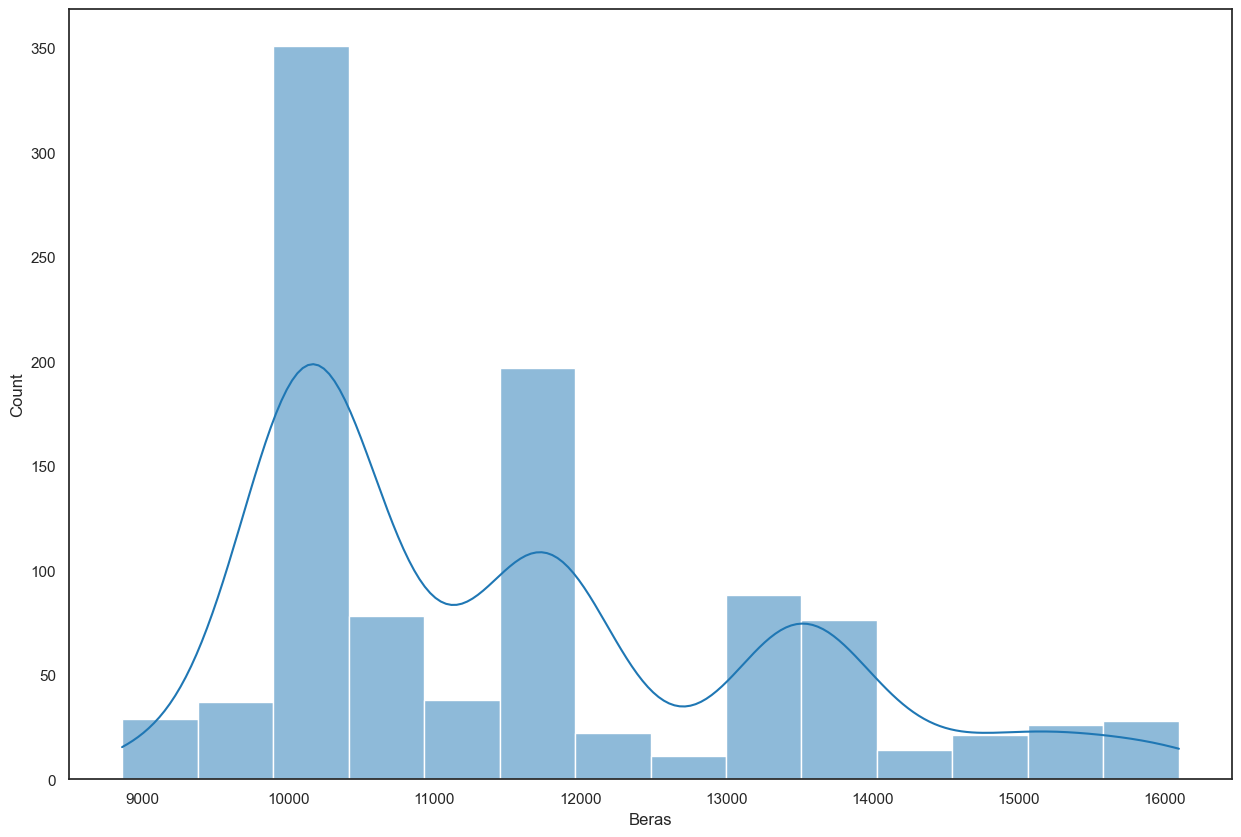

In [96]:
plt.figure(figsize=(15,10))
plt.tight_layout()
sns.histplot(data['Beras'], kde=True)

In [97]:
# Convert 'tanggal' to datetime
data['tanggal'] = pd.to_datetime(data['tanggal'], format='%d/%m/%Y', errors='coerce')

data.head(10)

,tanggal,Luas Panen Padi,GKPTP,GKPTPG,GKGTP,Beras
0,2022-06-01,10,4140,4410,5230,9970
1,2022-06-02,10,4160,4420,5250,9970
2,2022-06-03,10,4180,4410,5230,9890
3,2022-06-04,10,4160,4410,5230,9760
4,2022-06-05,10,4180,4420,5230,9840
5,2022-06-06,10,4180,4420,5280,9910
6,2022-06-07,10,4200,4430,5280,9910
7,2022-06-08,10,4200,4630,5280,9910
8,2022-06-09,30,4250,4520,5240,9800
9,2022-07-14,10,4260,4500,5190,9900


In [99]:
data_head = data.head(5)
data_tail = data.tail(5)

data_gab = pd.concat([data_head, data_tail])

data_gab

,tanggal,Luas Panen Padi,GKPTP,GKPTPG,GKGTP,Beras
0,2022-06-01,10,4140,4410,5230,9970
1,2022-06-02,10,4160,4420,5250,9970
2,2022-06-03,10,4180,4410,5230,9890
3,2022-06-04,10,4160,4410,5230,9760
4,2022-06-05,10,4180,4420,5230,9840
1011,2024-05-15,10,5430,5770,6710,13260
1012,2024-05-16,10,5420,5720,6740,13290
1013,2024-05-17,10,5450,5720,6740,13370
1014,2024-05-18,10,5480,5760,6810,13400
1015,2024-05-19,10,5540,5780,6870,13520


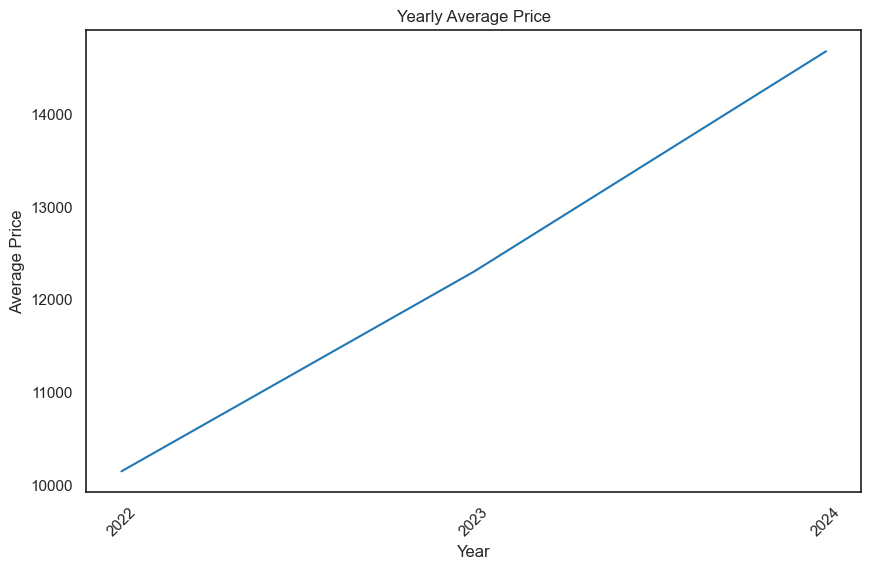

In [100]:
# Visualize data per year before processing
data['year'] = data['tanggal'].apply(lambda x: pd.Timestamp(x).year)
yearly_data = data.groupby('year')['Beras'].mean().reset_index()

plt.figure(figsize=(10, 6))
plt.plot(yearly_data['year'], yearly_data['Beras'])
plt.xlabel('Year')
plt.ylabel('Average Price')
plt.title('Yearly Average Price')
plt.xticks(yearly_data['year'], rotation=45)
plt.show()

In [101]:
# Convert datetime to ordinal
data['tanggal'] = data['tanggal'].apply(lambda x: x.toordinal() if pd.notnull(x) else np.nan)

# Handle missing values
data = data.dropna()

# Replace non-numeric values with NaN
data = data.apply(pd.to_numeric, errors='coerce')

# Fill NaN values with the mean of the column
data = data.fillna(data.mean())

data.info()
data.head(10)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1016 entries, 0 to 1015
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   tanggal          1016 non-null   int64  
 1   Luas Panen Padi  1016 non-null   float64
 2   GKPTP            1016 non-null   int64  
 3   GKPTPG           1016 non-null   int64  
 4   GKGTP            1016 non-null   int64  
 5   Beras            1016 non-null   int64  
 6   year             1016 non-null   int64  
dtypes: float64(1), int64(6)
memory usage: 55.7 KB


,tanggal,Luas Panen Padi,GKPTP,GKPTPG,GKGTP,Beras,year
0,738307,10.0,4140,4410,5230,9970,2022
1,738308,10.0,4160,4420,5250,9970,2022
2,738309,10.0,4180,4410,5230,9890,2022
3,738310,10.0,4160,4410,5230,9760,2022
4,738311,10.0,4180,4420,5230,9840,2022
5,738312,10.0,4180,4420,5280,9910,2022
6,738313,10.0,4200,4430,5280,9910,2022
7,738314,10.0,4200,4630,5280,9910,2022
8,738315,30.0,4250,4520,5240,9800,2022
9,738350,10.0,4260,4500,5190,9900,2022


In [102]:
# Define the features and the target
X = data[['tanggal', 'GKPTP', 'GKPTPG', 'GKGTP']]
y = data['Beras']

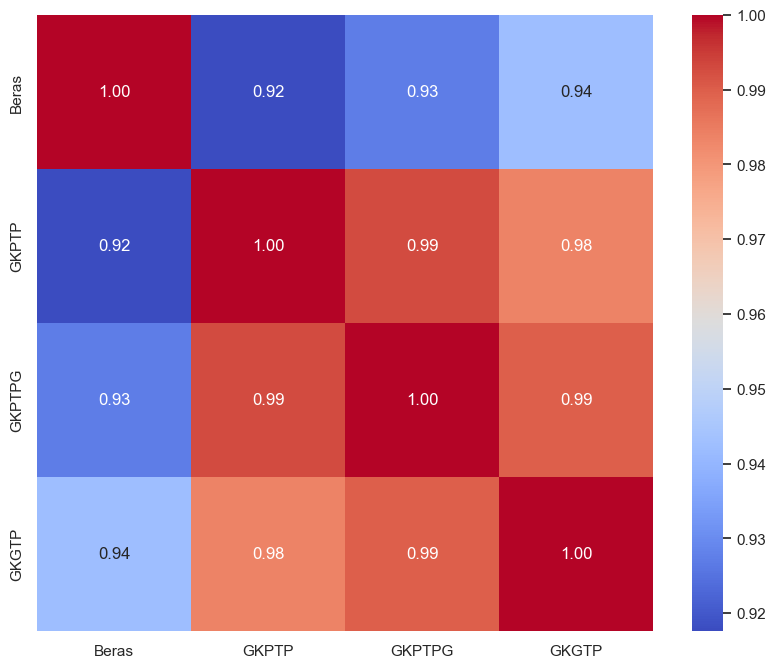

In [103]:
corr = data[['Beras', 'GKPTP', 'GKPTPG', 'GKGTP']].corr()
# Membuat scatter plot matriks
plt.figure(figsize=(10, 8))
sns.set_theme(style="white", palette=None)
# Draw a heatmap with the numeric values in each cell
sns.heatmap(corr, annot=True, fmt=".2f", cmap='coolwarm', cbar=True, square=True)
plt.show()

In [104]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [105]:
X_train.info()
X_train.head(5)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 812 entries, 5 to 684
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype
---  ------   --------------  -----
 0   tanggal  812 non-null    int64
 1   GKPTP    812 non-null    int64
 2   GKPTPG   812 non-null    int64
 3   GKGTP    812 non-null    int64
dtypes: int64(4)
memory usage: 31.7 KB


,tanggal,GKPTP,GKPTPG,GKGTP
5,738312,4180,4420,5280
351,738361,4240,4480,5290
689,738699,5360,5540,6300
732,738742,5390,5640,6490
648,738658,5100,5310,6080


In [106]:
X_test.info()
X_test.head(5)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 204 entries, 251 to 236
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype
---  ------   --------------  -----
 0   tanggal  204 non-null    int64
 1   GKPTP    204 non-null    int64
 2   GKPTPG   204 non-null    int64
 3   GKGTP    204 non-null    int64
dtypes: int64(4)
memory usage: 8.0 KB


,tanggal,GKPTP,GKPTPG,GKGTP
251,738227,4410,4610,5620
75,738416,4620,4790,5560
941,738951,7030,7430,8650
658,738668,5110,5280,6040
886,738896,6920,7220,8170


In [107]:
y_train.head(5)

5       9910
351     9910
689    11880
732    11980
648    11680
Name: Beras, dtype: int64

In [108]:
y_test.head(5)

251    10240
75     10280
941    15840
658    11660
886    13810
Name: Beras, dtype: int64

In [109]:
# Scale the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [110]:
# Initialize the Linear Regression model
regressor = LinearRegression()
regressor.fit(X_train,y_train)

LinearRegression()

In [111]:
# Make predictions on the testing data
y_prediction =  regressor.predict(X_test)
y_prediction

array([10019.1694656 , 10303.03095748, 14948.60689903, 11514.57374328,
       14019.57393692,  9811.95430125, 10227.07072498, 12006.44465184,
       10047.51889699, 10963.48337351, 11733.05951159, 14021.46352951,
       10117.17887533, 10568.29936726, 15518.39925196, 10207.48244487,
       12064.1966566 , 10616.35140247, 10638.91760827, 11665.98470068,
       15400.53632839, 13662.54044765, 13547.96493984, 10205.52071777,
       10856.7700174 , 10585.80560807, 11367.32801896, 10370.01351872,
       13710.60510727, 13567.33612756, 13299.54756523,  9940.82878119,
       14849.6315566 , 10684.90604574, 11737.75806794, 12314.97636599,
       13268.41007379, 11630.08861318, 11983.73055637,  9724.45552831,
       10139.50908534, 11697.85840398, 10049.59654827, 10009.34117904,
       10546.20556752, 10885.24694086, 10370.01351872, 14793.54321937,
        9694.19107262, 10280.7643751 , 11801.87812945,  9732.20197294,
       15427.71528036, 12112.70677102, 13433.38595548, 13299.1819371 ,
      

In [112]:
# Calculate the evaluation metrics
score = r2_score(y_test, y_prediction)
mean_error = mean_squared_error(y_test, y_prediction)
mae = mean_absolute_error(y_test, y_prediction)

print("R2 SCORE is", score)
print("mean_sqrd_error is ", mean_error)
print("Root mean squared error of is",np.sqrt(mean_error))
print("Mean Absolute error is", mae)

R2 SCORE is 0.9507604738877424
mean_sqrd_error is  148883.8054081321
Root mean squared error of is 385.85464284900354
Mean Absolute error is 283.14101829208323


In [113]:
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_prediction})
df

,Actual,Predicted
251,10240,10019.169466
75,10280,10303.030957
941,15840,14948.606899
658,11660,11514.573743
886,13810,14019.573937
...,...,...
491,10800,10909.462689
215,10200,9856.369035
592,11600,11310.340494
395,8910,9939.211558


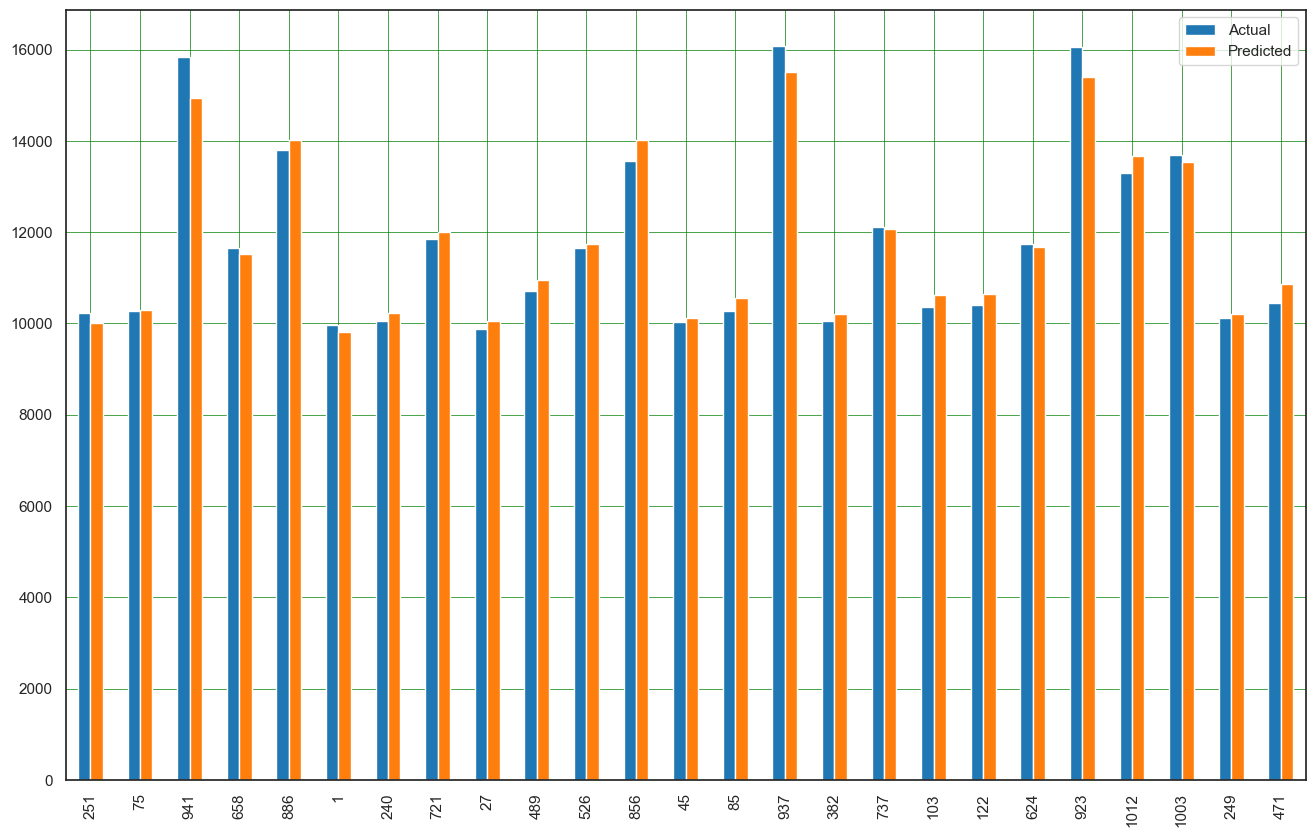

In [114]:
df1 = df.head(25)
df1.plot(kind='bar',figsize=(16,10))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()

In [115]:
# Calculate the difference and percentage error
result = pd.DataFrame()
result["ACTUAL PRICE"] = y_test
result["PREDICTED PRICE"] = y_prediction
result["DIFFERENCE"] = result["ACTUAL PRICE"] - result["PREDICTED PRICE"]
result["PERCENTAGE ERROR"] = ( abs(result["ACTUAL PRICE"] - result["PREDICTED PRICE"] ) / result["ACTUAL PRICE"] ) * 100
result.head(15)

,ACTUAL PRICE,PREDICTED PRICE,DIFFERENCE,PERCENTAGE ERROR
251,10240,10019.169466,220.830534,2.156548
75,10280,10303.030957,-23.030957,0.224037
941,15840,14948.606899,891.393101,5.627482
658,11660,11514.573743,145.426257,1.247223
886,13810,14019.573937,-209.573937,1.517552
1,9970,9811.954301,158.045699,1.585213
240,10050,10227.070725,-177.070725,1.761898
721,11850,12006.444652,-156.444652,1.320208
27,9880,10047.518897,-167.518897,1.695535
489,10720,10963.483374,-243.483374,2.271300
